# Zillow

acquire & summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import acquire_zillow

In [2]:
from env import host, password, username
def get_db_url(db_name, username=username, hostname=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

In [3]:
# url = get_db_url(db_name='zillow')

2. Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
    * Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
    * Only include properties that include a latitude and longitude value.
    * Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
# query = """ 
#             SELECT *
#             FROM properties_2017
#             JOIN predictions_2017 USING(parcelid)
#             LEFT JOIN airconditioningtype USING(airconditioningtypeid)
#             LEFT JOIN architecturalstyletype USING(architecturalstyletypeid)
#             LEFT JOIN buildingclasstype USING(buildingclasstypeid)
#             LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid)
#             LEFT JOIN propertylandusetype USING(propertylandusetypeid)
#             LEFT JOIN storytype USING(storytypeid)
#             LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
#             LEFT JOIN unique_properties USING(parcelid)
#             WHERE transactiondate BETWEEN '2017-01-01' AND '2017-12-31'
#         """

In [5]:
# df = pd.read_sql(query, url)
# df.head(3)

In [6]:
# df2 = pd.DataFrame(df.groupby('parcelid').transactiondate.max()).reset_index()

In [7]:
# df3 = pd.merge(df2, df, on=['parcelid','transactiondate'])
# print(len(df))
# print(len(df3))

In [8]:
# df = df3.copy()

In [9]:
# print(df.latitude.isna().sum())
# print(df.longitude.isna().sum())
# print(df.latitude.dropna().isna().sum())
# print(df[['latitude','longitude']].dropna().isna().sum())
# print(len(df))
# print(df[['latitude','longitude']].dropna().shape)
# print(len(df.dropna()))

In [10]:
# import pandas as pd

# from env import host, password, username

# def get_db_url(db_name, username=username, hostname=host, password=password):
#     """ Build an SQL query using env credentials """
#     return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

# def zillow_clustering_acquire():
#     """ Acquire each table from Codeup database 'zillow' from 2017 with 
#         one entry per parcel (latest transaction date) and no nulls in lat/long """
#     # Build query
#     url = get_db_url(db_name='zillow')
#     query = """ 
#                 SELECT *
#                 FROM properties_2017
#                 JOIN predictions_2017 USING(parcelid)
#                 LEFT JOIN airconditioningtype USING(airconditioningtypeid)
#                 LEFT JOIN architecturalstyletype USING(architecturalstyletypeid)
#                 LEFT JOIN buildingclasstype USING(buildingclasstypeid)
#                 LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid)
#                 LEFT JOIN propertylandusetype USING(propertylandusetypeid)
#                 LEFT JOIN storytype USING(storytypeid)
#                 LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
#                 LEFT JOIN unique_properties USING(parcelid)
#                 WHERE (transactiondate BETWEEN '2017-01-01' AND '2017-12-31')
#                     AND (latitude IS NOT NULL) 
#                     AND (longitude IS NOT NULL)
#             """
#     # Run query
#     df1 = pd.read_sql(query, url)
#     # Create separate indexing df with one entry per parcel
#     df2 = pd.DataFrame(df1.groupby('parcelid').transactiondate.max()).reset_index()
#     # Join the two dataframes
#     df = pd.merge(df2, df1, on=['parcelid','transactiondate'])
    
#     return df

In [11]:
df = acquire_zillow.zillow_clustering_acquire()

In [12]:
df[['parcelid','latitude','longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77380
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   parcelid   77381 non-null  int64  
 1   latitude   77381 non-null  float64
 2   longitude  77381 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.4 MB


In [13]:
len(df.parcelid.drop_duplicates())

77381

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [14]:
df.parcelid.isna().sum()

0

In [15]:
def attribute_deets(df):
    # Create empty lists
    column_list = []
    nullcount_list = []
    percentage_list = []
    # Read each column's metrics into each list
    for col in df.columns:
        column_list.append(col)
        nullcount_list.append(df[col].isna().sum())
        percentage_list.append(df[col].isna().sum() / len(df))
    
    df_dict = {'attribute':column_list, 
               'nullcount':nullcount_list,
               'percent_null':percentage_list}
    df = pd.DataFrame(df_dict)
    
    return df

In [16]:
attribute_deets(df)

,attribute,nullcount,percent_null
0,parcelid,0,0.000000
1,transactiondate,0,0.000000
2,typeconstructiontypeid,77159,0.997131
3,storytypeid,77331,0.999354
4,propertylandusetypeid,0,0.000000
...,...,...,...
64,propertylandusedesc,0,0.000000
65,storydesc,77331,0.999354
66,typeconstructiondesc,77159,0.997131
67,property_id,0,0.000000


1. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [17]:
def column_deets(df):
    # Calculate row-wise metrics for null columns
    rowwise_null_cols = df.isna().sum(axis=1) # for each row, get the count of null columns
    rowwise_null_col_percentage = (rowwise_null_cols / len(df.columns)) * 100 # % of cols with nulls
    # Put calculations in dataframe
    col_metrics_df = pd.DataFrame({'rowwise_null_cols':rowwise_null_cols,
                  'null_col_proportion':rowwise_null_col_percentage}).reset_index()
    # Group down to counts of similar rows
    col_metrics_df = col_metrics_df.groupby(['rowwise_null_cols', 'null_col_proportion']).count().reset_index()
    # Rename grouped column
    col_metrics_df = col_metrics_df.rename(columns={'index':'count_similar_rows'})
    
    return col_metrics_df

In [18]:
column_deets(df)

,rowwise_null_cols,null_col_proportion,count_similar_rows
0,23,33.333333,2
1,24,34.782609,13
2,25,36.231884,24
3,26,37.681159,65
4,27,39.130435,316
5,28,40.579710,455
6,29,42.028986,5270
7,30,43.478261,3455
8,31,44.927536,9891
9,32,46.376812,12579


1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [19]:
df.head(0)

,parcelid,transactiondate,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,basementsqft,...,logerror,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,property_id,transaction_id


In [20]:
df.propertylandusedesc.unique()

array(['Single Family Residential', 'Planned Unit Development',
       'Condominium', 'Duplex (2 Units, Any Combination)', 'Mobile Home',
       'Commercial/Office/Residential Mixed Used',
       'Quadruplex (4 Units, Any Combination)',
       'Triplex (3 Units, Any Combination)', 'Townhouse',
       'Residential General', 'Cooperative', 'Cluster Home',
       'Manufactured, Modular, Prefabricated Homes'], dtype=object)

- propertylandusedesc: 'Single Family Residential', 'Mobile Home', 'Manufactured, Modular, Prefabricated Homes'
- architecturalstyledesc: 'Bungalow', 'Ranch/Rambler'

In [21]:
for col in df.columns:
    print(df[col].unique())

[ 10711855  10711877  10711888 ... 167687839 167688532 167689317]
['2017-07-07' '2017-08-29' '2017-04-04' '2017-03-17' '2017-03-24'
 '2017-01-30' '2017-07-03' '2017-03-09' '2017-08-01' '2017-02-22'
 '2017-07-28' '2017-03-30' '2017-05-25' '2017-05-24' '2017-03-14'
 '2017-02-17' '2017-01-06' '2017-03-23' '2017-06-30' '2017-01-20'
 '2017-05-05' '2017-06-19' '2017-06-22' '2017-07-20' '2017-04-05'
 '2017-08-30' '2017-01-19' '2017-02-15' '2017-05-11' '2017-07-25'
 '2017-09-13' '2017-06-29' '2017-04-21' '2017-09-08' '2017-01-12'
 '2017-06-28' '2017-06-05' '2017-01-13' '2017-06-16' '2017-03-08'
 '2017-05-26' '2017-04-24' '2017-02-27' '2017-03-01' '2017-06-27'
 '2017-08-31' '2017-06-14' '2017-05-17' '2017-07-26' '2017-03-22'
 '2017-05-04' '2017-09-09' '2017-05-01' '2017-06-13' '2017-05-31'
 '2017-05-08' '2017-08-11' '2017-02-08' '2017-09-14' '2017-02-21'
 '2017-06-26' '2017-03-20' '2017-06-09' '2017-08-23' '2017-08-10'
 '2017-02-26' '2017-04-12' '2017-02-23' '2017-06-15' '2017-01-25'
 '2017-01-

[-1.18617387e+08 -1.18616409e+08 -1.18616854e+08 ... -1.18520239e+08
 -1.18262402e+08 -1.18020570e+08]
[ 9158.  9035.  9800. ... 24662. 21802. 32226.]
[ 1. nan]
[  nan  750.  512.  600.  800.  450. 1120.  648.  630.  240.  520.  832.
  751.  453.  735.  640.  404.  448.  592.  720.  435.  576.  540.  525.
  468.   38.   24.  350.  510.  500.  495.  544.  370.  578.  770.  416.
  300.  200.  375.  377.  360.  420.  398. 1000.  480.  472.  364.  408.
  391.  400.  570.  432.  728.  680.  740. 1065.  722.  608.  595.  324.
  684.  385.  670.  487.  312.  372.  424.  601.  384.  465.  256.  590.
  550.  250.  764.  594.   65.  650.  702.  704.  255.  233.  555.  557.
  629.  496.  327.  428.  467.  430.  475.  476.  655.  710.  451.  738.
  657.  515.  530.  528.  129.  410.  238. 1052.  564.  462.  552.  580.
  535.  478.  440.  562.  368.  459.  700.  482.  850.  560.  551.  504.
  405.  646.  320.  486.  460.  427.  490.  635.  583.  345.  425.  347.
  575.  612.  694.  429.  325.  456.

In [22]:
df = df[(df.propertylandusedesc == 'Single Family Residential') | 
  (df.propertylandusedesc == 'Mobile Home') | 
  (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes') | 
  (df.architecturalstyledesc == 'Bungalow') | 
  (df.architecturalstyledesc == 'Ranch/Rambler')]

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    * A dataframe
    * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    * The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
    * hint: Look up the dropna documentation.
    * You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    * Make use of inplace, i.e. inplace=True/False.

In [23]:
((df.isna().sum(axis=0) / len(df)) > .5).index

Index(['parcelid', 'transactiondate', 'typeconstructiontypeid', 'storytypeid',
       'propertylandusetypeid', 'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbui

In [24]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    
    return df

3. *Decide* how to handle the remaining missing values:
    * Fill with constant value.
    * Impute with mean, median, mode.
    * Drop row/column

# Mall Customers

notebook

- Acquire data from mall_customers.customers in mysql database.
- Summarize data (include distributions and descriptive statistics).
- Detect outliers using IQR.
- Split data (train, validate, and test split).
- Encode categorical columns using a one hot encoder (pd.get_dummies).
- Handles missing values.
- Scaling

wrangle_mall.py

- Acquire data from mall_customers.customers in mysql database.
- Split the data into train, validate, and split
- One-hot-encoding (pd.get_dummies)
- Missing values
- Scaling

In [25]:
### Acquire mall_customers database ###
url = get_db_url(db_name='mall_customers')
query = """ SELECT * FROM customers """
df = pd.read_sql(query, url)
df.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000

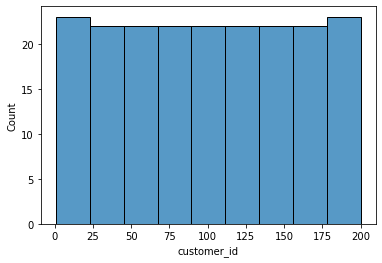

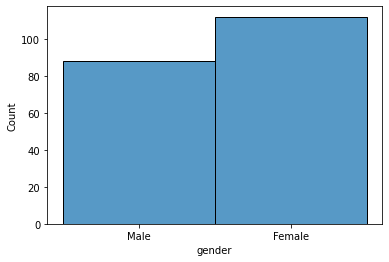

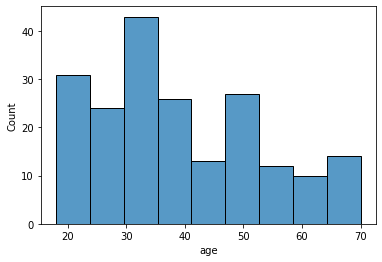

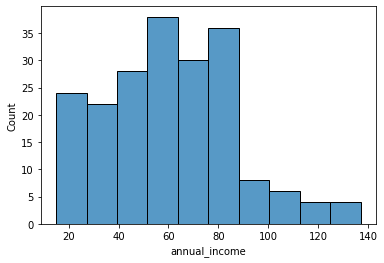

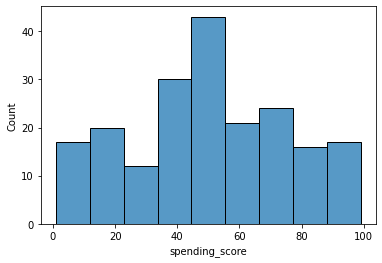

   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6


In [26]:
### Summarize data including distributions and descriptive statistics ###
print(df.describe(), df.shape, df.info())
for col in df.columns:
    sns.histplot(df[col])
    plt.show()
print(df.head(3))

In [27]:
### Detect outliers using IQR ###
print("Original dataframe shape:", df.shape, "\n")
for col in df[['age','annual_income','spending_score']].columns:
    q1, q3 = df[col].quantile([.25, .75])
    df_new = df[(df[col] > q1) & (df[col] < q3)]
    print(col, "\nQ1:", q1, "\nQ3:", q3, "\nRows:", df_new.shape[0], "\n")

Original dataframe shape: (200, 5) 

age 
Q1: 28.75 
Q3: 49.0 
Rows: 98 

annual_income 
Q1: 41.5 
Q3: 78.0 
Rows: 98 

spending_score 
Q1: 34.75 
Q3: 73.0 
Rows: 99 



In [28]:
### Handle missing values, Encode ###
# df.isna().sum() # No missing values
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [29]:
### Split data ###
df.drop(columns='customer_id', inplace=True)

from sklearn.model_selection import train_test_split
train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=0.25, random_state=123)

train.shape, validate.shape, test.shape

((120, 4), (40, 4), (40, 4))

In [30]:
### Scale data ###
X_train, y_train = train.drop(columns='spending_score'), train.spending_score
X_validate, y_validate = validate.drop(columns='spending_score'), validate.spending_score
X_test, y_test = test.drop(columns='spending_score'), test.spending_score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 1.03595709, -0.5097623 , -0.78842985],
       [-0.67920365, -0.78077517, -0.78842985],
       [ 1.03595709, -1.24536865, -0.78842985],
       [ 0.34989279,  0.49685692, -0.78842985],
       [ 1.3103828 ,  1.07759878,  1.26834366]])

In [31]:
import wrangle_mall

In [32]:
df = wrangle_mall.wrangle_mall()
X_train_scaled[:5]

array([[ 1.03595709, -0.5097623 , -0.78842985],
       [-0.67920365, -0.78077517, -0.78842985],
       [ 1.03595709, -1.24536865, -0.78842985],
       [ 0.34989279,  0.49685692, -0.78842985],
       [ 1.3103828 ,  1.07759878,  1.26834366]])